# Changes occurring in primary care SCREENING activity during the pandemic

## Producing decile charts to show activity across all practices in TPP

Jump to charts:
- [High level codes](#highlevel)
- [Detailed codes](#detailed)

In [1]:
import pyodbc
import pandas as pd
import os
import re
from IPython.display import display, Markdown


dbconn = os.environ.get('DBCONN', None)
if dbconn is None:
    display("No SQL credentials. Check that the file 'environ.txt' is present. Refer to readme for further information")
else:
    dbconn = dbconn.strip('"')
    
# import custom functions from 'analysis' folder
import sys
sys.path.append('../lib/')
    
from functions import closing_connection, load_filter_codelists, filter_codelists, plotting_all


# global variables 
if 'OPENCoronaExport' in dbconn:
    threshold = 1 # min activity threshold in dummy data
else:
    threshold = 1000

# descriptions for ctv3 codes    
codes = pd.read_csv(os.path.join('..','data','code_dictionary.csv'))

In [2]:
######################### customise ################################
# Create lists of keywords and/or CTV3 concepts to filter codelist
keywords = ["screen", "smear", "NHS health check"] # case INsensitive
concepts = []

display(Markdown(f"## Load list of common codes from csv and filter to Screening only"))

end_date = "20201231"
####################################################################


highlevel, detailed = load_filter_codelists(end_date, keywords=keywords, concepts=concepts)

## Load list of common codes from csv and filter to Screening only

High level codes: 2

Detailed codes: 21

### Additional manual filtering
Customised for each topic after inspecting the results of the previous step

In [3]:
######################### customise ################################
# remove irrelevant items by filtering on CTV3 concepts/descriptions
concepts1 = []
keywords1 = []
concepts2 = [] 
keywords2 = []
####################################################################

highlevel = filter_codelists(highlevel, concepts=concepts1, keywords=keywords1, codelist_type="High level",  eventcount=True)
detailed = filter_codelists(detailed, concepts=concepts2, keywords=keywords2, codelist_type="Detailed",  eventcount=True) 


######################### customise ################################
# replace all detailed concepts with single topic
highlevel["concept_desc"] = "Screening"
detailed["concept_desc"] = "Screening"
####################################################################

High level codes: 2

Event count: 4.36 million

Detailed codes: 21

Event count: 11.91 million

# Plotting decile charts
### Charts highlight the median practice for the rate of each code occurrence each month, along with the rates at each decile (10-90%)
- NB Practice denominators (list size) and patient registrations only include current patients

# High level codes <a id="highlevel"></a>

Jump to [detailed codes](#detailed)

# --- 
 # Category: Screening

Total events: 4.36 m

## Contents:

,first_digits,Description,2020 events (mill),2020 Patient count (mill)
12,9O,Admin: [prevention &/or screen][clinic monit][...,3.28,2.42
19,68,Screening (& [health check]),1.08,0.90


## "9O" - Admin: [prevention &/or screen][clinic monit][contraceptive] 
 ### (Practices included: 2.5k (99.9%); 2020 patients: 2.42m; 2020 events: 3.28m)

Feb median: 4.8 (IDR 27.7), April median: 0.4 (IDR 7.1), December median: 3.2 (IDR 29.3)

Change in median from 2019: April -88.7% (Large drop); December -60.8%, (Large drop); Overall classification: **Sustained drop**

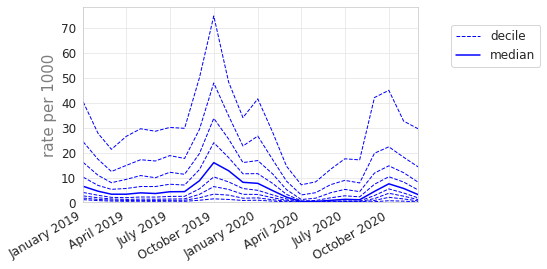

Top 'child' codes represented within parent code above:

,first_digits,2020 events (thou),Description
0,9OX4,997.2,Needs influenza immunisation
1,9OL4,182.2,Diabetes monitoring first letter
2,9OJ4,168.4,Asthma monitoring call first letter
3,9OE1,163.8,Chronic disease monitoring - first recall
4,9OI4,151.5,Hypertension monitoring first letter


### Trend in top child code: 9OX4 - Needs influenza immunisation

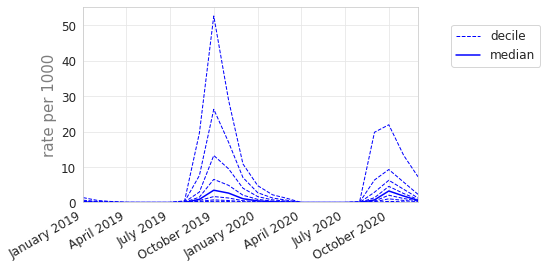

## "68" - Screening (& [health check]) 
 ### (Practices included: 2.5k (99.9%); 2020 patients: 899.7k; 2020 events: 1.08m)

Feb median: 3.1 (IDR 10.8), April median: 0.4 (IDR 3.6), December median: 1.3 (IDR 9.5)

Change in median from 2019: April -86.8% (Large drop); December -48.7%, (Small drop); Overall classification: **Sustained drop**

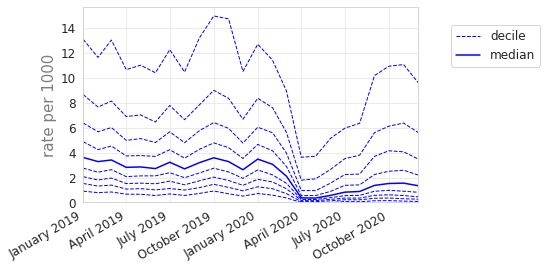

Top 'child' codes represented within parent code above:

,first_digits,2020 events (thou),Description
50,68620,186.4,Breast neoplasm screening normal
51,68N5,147.2,Full consent for immunisation
52,68NV,95.5,Influenza vacc consent given
53,6892,93.9,Alcohol consumption screening
54,68R,49.5,New patient screening


### Trend in top child code: 68620 - Breast neoplasm screening normal

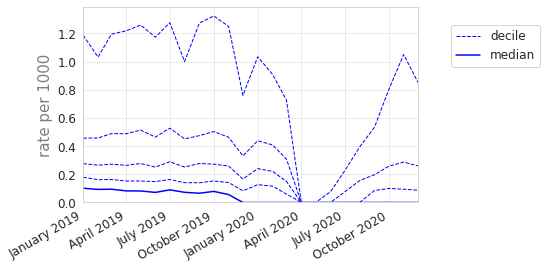

In [4]:
N = min(len(highlevel), 25) # number of charts to plot
plotting_all(highlevel, codes, N, threshold, end_date, dbconn, True)

# Detailed codes <a id="detailed"></a>

# --- 
 # Category: Screening

Total events: 11.91 m

## Contents:

,first_digits,Description,2020 events (mill),2020 Patient count (mill)
126,XaPVj,Bowel cancer screening programme: faecal occul...,1.29,1.28
138,Y00e7,Advice given - cervical smear,1.12,0.56
140,Xa8Pl,Cervical smear,1.11,1.06
150,XaKTi,Liquid based cervical cytology screening,1.00,0.93
152,Y0384,Smear Under GMS,0.99,0.97
170,Y3562,Smear consent given,0.90,0.88
185,Y0385,Smear Slide Number,0.83,0.82
211,Y0390,Smear Reason: Routine Recall,0.66,0.66
254,XE278,Cervical smear - negative,0.49,0.48
285,XaIIj,Diabetic retinopathy screening,0.42,0.35


## "XaPVj" - Bowel cancer screening programme: faecal occult blood result 
 ### (Practices included: 2.5k (99.7%); 2020 patients: 1.28m; 2020 events: 1.29m)

Feb median: 6.4 (IDR 6.1), April median: 3.0 (IDR 2.7), December median: 6.5 (IDR 7.5)

Change in median from 2019: April -52.1% (Small drop); December 12.0%, (No change); Overall classification: **Recovered**

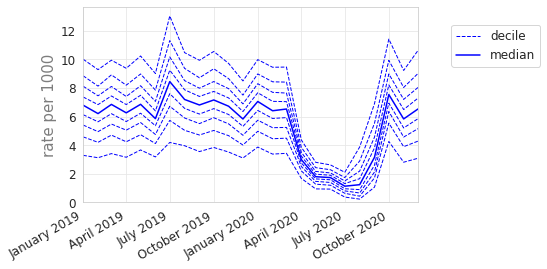

## "Y00e7" - Advice given - cervical smear 
 ### (Practices included: 2.4k (95.0%); 2020 patients: 556.6k; 2020 events: 1.12m)

Feb median: 0.4 (IDR 15.7), April median: 0.0 (IDR 2.6), December median: 1.5 (IDR 10.8)

Change in median from 2019: April -100.0% (Large drop); December 475.9%, (Increase); Overall classification: **Increase**

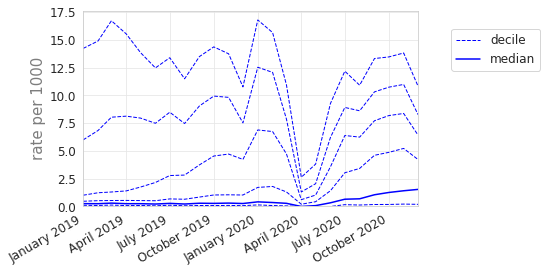

## "Xa8Pl" - Cervical smear 
 ### (Practices included: 2.5k (99.7%); 2020 patients: 1.06m; 2020 events: 1.11m)

Feb median: 4.8 (IDR 4.0), April median: 0.2 (IDR 1.3), December median: 3.9 (IDR 3.7)

Change in median from 2019: April -95.6% (Large drop); December 20.9%, (Increase); Overall classification: **Increase**

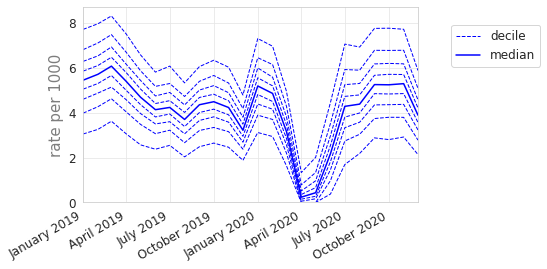

## "XaKTi" - Liquid based cervical cytology screening 
 ### (Practices included: 2.5k (99.6%); 2020 patients: 932.2k; 2020 events: 1.0m)

Feb median: 4.4 (IDR 5.7), April median: 0.2 (IDR 1.2), December median: 3.5 (IDR 4.6)

Change in median from 2019: April -96.8% (Large drop); December 23.8%, (Increase); Overall classification: **Increase**

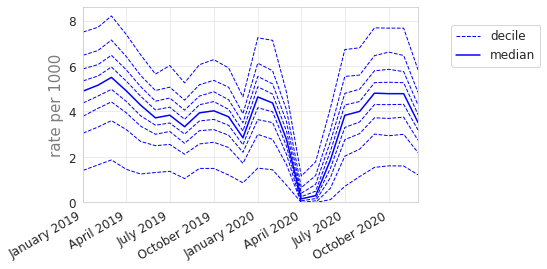

## "Y0384" - Smear Under GMS 
 ### (Practices included: 2.5k (99.7%); 2020 patients: 967.4k; 2020 events: 0.99m)

Feb median: 4.5 (IDR 4.8), April median: 0.2 (IDR 1.3), December median: 3.6 (IDR 4.2)

Change in median from 2019: April -96.2% (Large drop); December 23.3%, (Increase); Overall classification: **Increase**

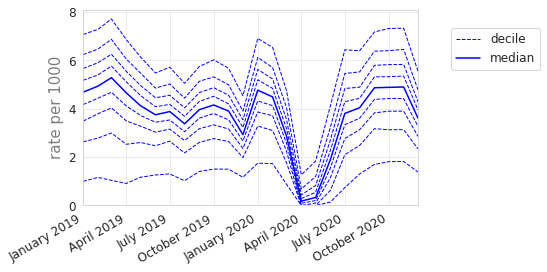

## "Y3562" - Smear consent given 
 ### (Practices included: 2.5k (99.7%); 2020 patients: 881.4k; 2020 events: 0.9m)

Feb median: 4.3 (IDR 4.6), April median: 0.2 (IDR 1.2), December median: 3.2 (IDR 4.4)

Change in median from 2019: April -96.6% (Large drop); December 14.3%, (No change); Overall classification: **Recovered**

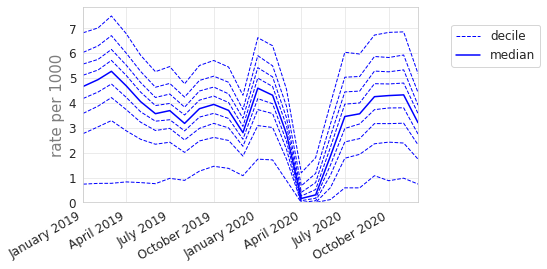

## "Y0385" - Smear Slide Number 
 ### (Practices included: 2.5k (99.4%); 2020 patients: 820.2k; 2020 events: 0.83m)

Feb median: 3.7 (IDR 6.3), April median: 0.5 (IDR 3.1), December median: 3.6 (IDR 6.7)

Change in median from 2019: April -87.2% (Large drop); December 29.4%, (Increase); Overall classification: **Increase**

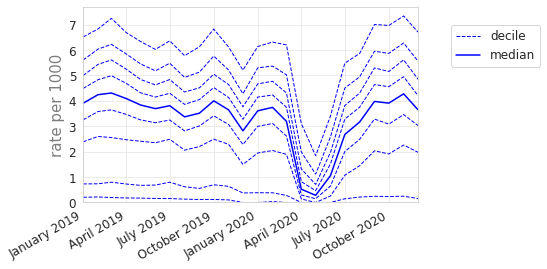

## "Y0390" - Smear Reason: Routine Recall 
 ### (Practices included: 2.5k (99.4%); 2020 patients: 655.0k; 2020 events: 0.66m)

Feb median: 2.9 (IDR 4.6), April median: 0.0 (IDR 0.8), December median: 2.4 (IDR 3.9)

Change in median from 2019: April -100.0% (Large drop); December 31.8%, (Increase); Overall classification: **Increase**

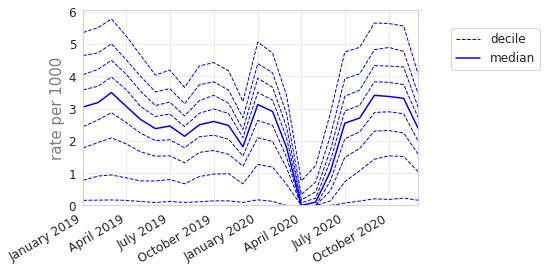

## "XE278" - Cervical smear - negative 
 ### (Practices included: 2.5k (99.6%); 2020 patients: 480.7k; 2020 events: 0.49m)

Feb median: 0.8 (IDR 5.1), April median: 0.3 (IDR 2.3), December median: 1.1 (IDR 5.7)

Change in median from 2019: April -93.1% (Large drop); December 4.8%, (No change); Overall classification: **Recovered**

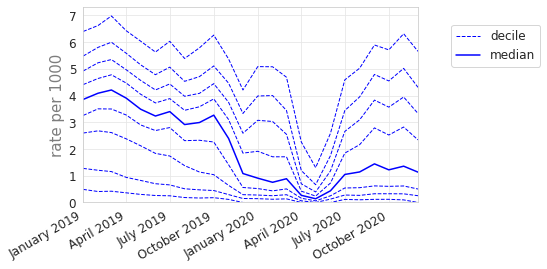

## "XaIIj" - Diabetic retinopathy screening 
 ### (Practices included: 2.5k (99.5%); 2020 patients: 347.5k; 2020 events: 0.42m)

Feb median: 1.8 (IDR 6.2), April median: 0.0 (IDR 0.5), December median: 0.7 (IDR 3.9)

Change in median from 2019: April -100.0% (Large drop); December -49.0%, (Small drop); Overall classification: **Sustained drop**

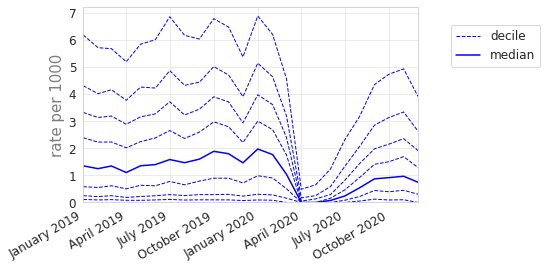

## "9O8" - Cervical smear screening administration 
 ### (Practices included: 2.5k (99.2%); 2020 patients: 324.1k; 2020 events: 0.41m)

Feb median: 0.2 (IDR 3.8), April median: 0.0 (IDR 1.9), December median: 0.0 (IDR 3.8)

Change in median from 2019: April -100.0% (Large drop); December -100.0%, (Large drop); Overall classification: **Sustained drop**

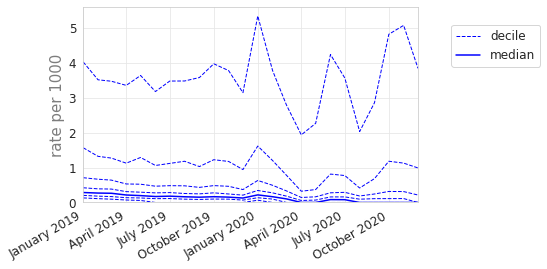

Top 'child' codes represented within parent code above:

,first_digits,2020 events (thou),Description
0,9O85,80.5,Cervical smear - 1st recall
1,9O81,79.5,Cervical smear - 1st call
2,9O8,55.1,Cervical smear screening administration
3,9O87,53.1,Cervical smear - 3rd recall
4,9O83,36.1,Cervical smear - 3rd call


## "XaPf6" - No response to bowel cancer screening programme invitation 
 ### (Practices included: 2.5k (99.6%); 2020 patients: 374.0k; 2020 events: 0.4m)

Feb median: 2.1 (IDR 2.2), April median: 2.2 (IDR 2.3), December median: 0.6 (IDR 2.1)

Change in median from 2019: April -3.9% (No change); December -70.4%, (Large drop); Overall classification: **No change**

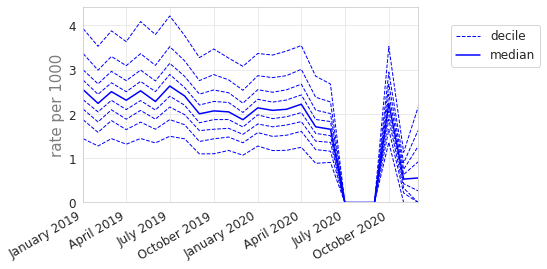

## "68N" - Immunisation status: [screen] or [consent status] 
 ### (Practices included: 2.5k (99.6%); 2020 patients: 267.4k; 2020 events: 0.33m)

Feb median: 0.5 (IDR 3.6), April median: 0.1 (IDR 1.5), December median: 0.0 (IDR 2.7)

Change in median from 2019: April -81.9% (Large drop); December -100.0%, (Large drop); Overall classification: **Sustained drop**

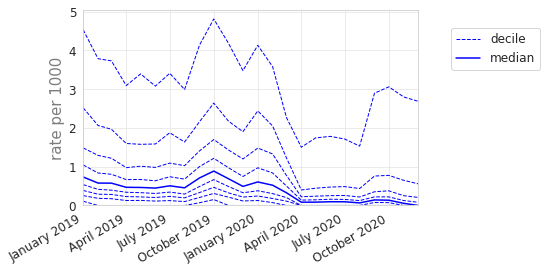

Top 'child' codes represented within parent code above:

,first_digits,2020 events (thou),Description
11,68N5,147.2,Full consent for immunisation
12,68NV,95.5,Influenza vacc consent given
13,68N2,23.2,Not up-to-date with immunisation
14,68N1,21.9,Up-to-date with immunisations
15,68N3,18.5,Immunisation offered


## "XaagX" - Cervical smear - human papillomavirus negative 
 ### (Practices included: 2.5k (96.4%); 2020 patients: 317.2k; 2020 events: 0.32m)

Feb median: 0.3 (IDR 4.5), April median: 0.0 (IDR 0.9), December median: 0.0 (IDR 4.2)

Change in median from 2019: April 0.0% (No change); December -73.9%, (Large drop); Overall classification: **No change**

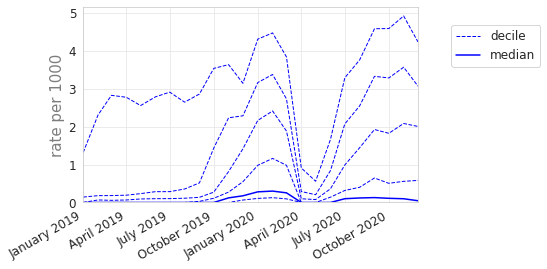

## "XaRBT" - NHS Health Check invitation first letter 
 ### (Practices included: 2.5k (98.2%); 2020 patients: 259.1k; 2020 events: 0.27m)

Feb median: 0.1 (IDR 6.2), April median: 0.0 (IDR 0.0), December median: 0.0 (IDR 0.6)

Change in median from 2019: April -100.0% (Large drop); December -100.0%, (Large drop); Overall classification: **Sustained drop**

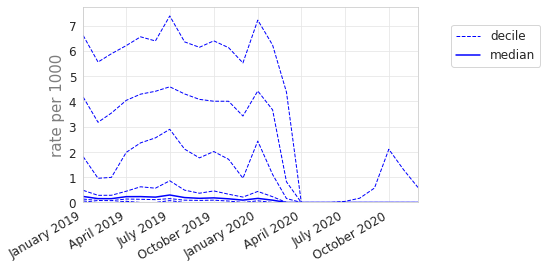

## "XaZJJ" - Cervical smear screening SMS message text 
 ### (Practices included: 2.4k (94.1%); 2020 patients: 170.3k; 2020 events: 0.25m)

Feb median: 0.0 (IDR 0.3), April median: 0.0 (IDR 0.0), December median: 0.0 (IDR 0.8)

Change in median from 2019: April 0% (No change); December 0%, (No change); Overall classification: **No change**

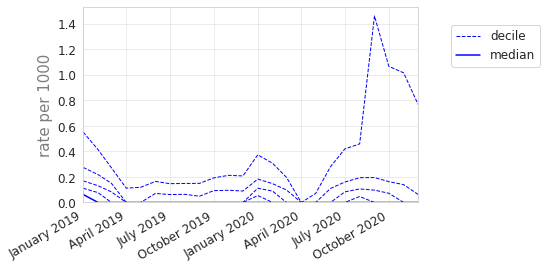

## "Y0389" - Smear Reason: Routine Call 
 ### (Practices included: 2.5k (99.5%); 2020 patients: 240.5k; 2020 events: 0.24m)

Feb median: 0.7 (IDR 2.9), April median: 0.0 (IDR 0.3), December median: 0.5 (IDR 2.2)

Change in median from 2019: April -100.0% (Large drop); December 6.3%, (No change); Overall classification: **Recovered**

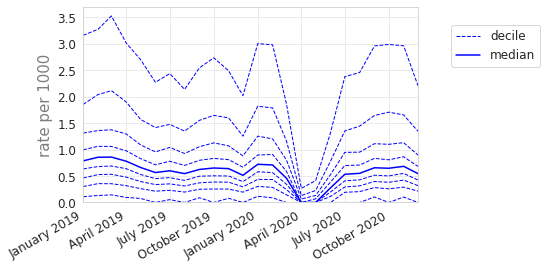

## "XaaPs" - Human papillomavirus screening 
 ### (Practices included: 2.0k (79.7%); 2020 patients: 223.4k; 2020 events: 0.23m)

Feb median: 0.0 (IDR 3.6), April median: 0.0 (IDR 0.3), December median: 0.0 (IDR 3.6)

Change in median from 2019: April 0% (No change); December 0%, (No change); Overall classification: **No change**

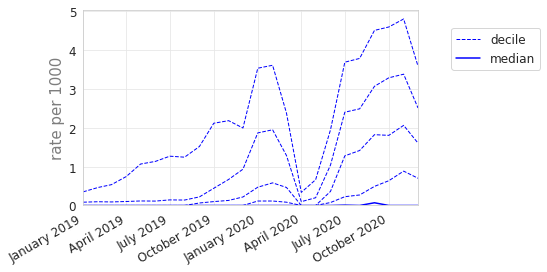

## "Y0387" - Smear Clinical Data 
 ### (Practices included: 2.5k (97.6%); 2020 patients: 223.3k; 2020 events: 0.23m)

Feb median: 0.2 (IDR 3.1), April median: 0.0 (IDR 0.5), December median: 0.1 (IDR 2.8)

Change in median from 2019: April -100.0% (Large drop); December -8.3%, (No change); Overall classification: **Recovered**

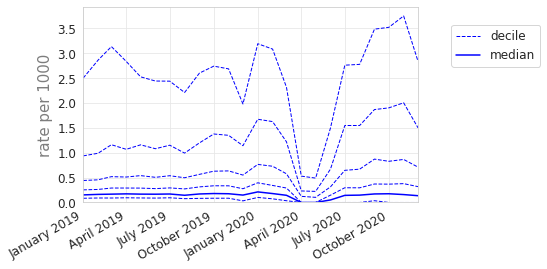

## "XaMwb" - Alcohol screen - AUDIT C completed 
 ### (Practices included: 2.5k (97.4%); 2020 patients: 197.6k; 2020 events: 0.21m)

Feb median: 0.1 (IDR 3.4), April median: 0.0 (IDR 0.8), December median: 0.0 (IDR 2.5)

Change in median from 2019: April -100.0% (Large drop); December -100.0%, (Large drop); Overall classification: **Sustained drop**

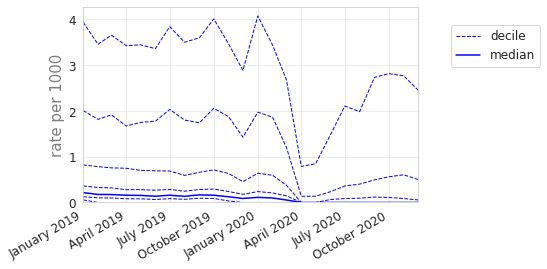

## "XaRBQ" - NHS Health Check completed 
 ### (Practices included: 2.5k (99.5%); 2020 patients: 181.7k; 2020 events: 0.21m)

Feb median: 1.8 (IDR 4.9), April median: 0.0 (IDR 0.1), December median: 0.0 (IDR 2.1)

Change in median from 2019: April -100.0% (Large drop); December -100.0%, (Large drop); Overall classification: **Sustained drop**

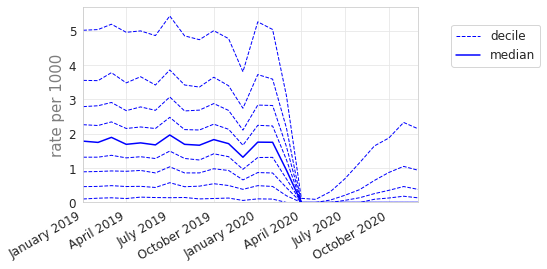

In [5]:
N = min(len(detailed), 25) # number of charts to plot
plotting_all(detailed, codes, N, threshold, end_date, dbconn, False)